In [1]:
import pandas as pd 
import numpy as np
import glob
from neuralprophet import NeuralProphet


In [ ]:
tickers = glob.glob("../../data/history/*.csv")
for file in tickers:
    try: 
        df = pd.read_csv(file)
        name = file[file.find("../../data/history\\") + len("../../data/history\\"):file.find(".csv")]
        df["ds"] = pd.to_datetime(df.time)
        df["y"] = df["close_price"]
        df = df[["y", "ds"]]

        df = pd.concat([df, pd.DataFrame({"ds": (pd.date_range(df.ds.min(), df.ds.max())).difference(df.ds), 
                           "y": np.NaN})])
        df = df.sort_values(by="ds")
        df = df.fillna(method = 'pad').reset_index(drop = True)

        prophet = NeuralProphet(
            n_forecasts=30,
            n_lags=20,
            yearly_seasonality=False,
            weekly_seasonality=True,
            daily_seasonality=False,
            batch_size=16,
            epochs=500,
            learning_rate=0.01
        )
    
        metrics = prophet.fit(df, freq = "D")
        
        future = prophet.make_future_dataframe(df, periods=60, n_historic_predictions=30) #we need to specify the number of days in future
        prediction = prophet.predict(future)

        output = prediction.loc[53:][["ds", "yhat30"]]
        output["symbol"] = name
        output.to_csv(f"forecasts/{name}.csv")
    except: 
        continue

Epoch[500/500]: 100%|█████████████████████████████████████████████████████████████████████| 500/500 [01:04<00:00,  7.77it/s, SmoothL1Loss=0.0115, MAE=0.318, RMSE=0.613, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|█████████████████████████████████████████████████████████████████████| 500/500 [01:04<00:00,  7.70it/s, SmoothL1Loss=0.000769, MAE=3.45, RMSE=4.56, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|███████████████████████████████████████████████████████████████████████| 500/500 [00:38<00:00, 13.09it/s, SmoothL1Loss=0.00591, MAE=6.4, RMSE=8.32, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|█████████████████████████████████████████████████████████████████████| 500/500 [00

Epoch[500/500]: 100%|███████████████████████████████████████████████████████████████████| 500/500 [01:11<00:00,  7.02it/s, SmoothL1Loss=0.000398, MAE=0.286, RMSE=0.419, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|█████████████████████████████████████████████████████████████████████| 500/500 [01:00<00:00,  8.31it/s, SmoothL1Loss=0.00159, MAE=0.111, RMSE=0.16, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 80.83it/s, SmoothL1Loss=0.00388, MAE=0.272, RMSE=0.342, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|██████████████████████████████████████████████████████████████████| 500/500 [00:09

Epoch[500/500]: 100%|███████████████████████████████████████████████████████████████████████| 500/500 [00:40<00:00, 12.35it/s, SmoothL1Loss=0.00452, MAE=2.97, RMSE=4.2, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|█████████████████████████████████████████████████████████████████████████| 500/500 [00:38<00:00, 12.85it/s, SmoothL1Loss=0.00229, MAE=5.06, RMSE=7, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|███████████████████████████████████████████████████████████████████████| 500/500 [00:38<00:00, 12.94it/s, SmoothL1Loss=0.00455, MAE=5.5, RMSE=6.85, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|████████████████████████████████████████████████████████████████████| 500/500 [00:

Epoch[500/500]: 100%|████████████████████████████████████████████████████████████████████| 500/500 [00:15<00:00, 32.35it/s, SmoothL1Loss=0.00355, MAE=0.234, RMSE=0.305, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|████████████████████████████████████████████████████████████████████| 500/500 [00:38<00:00, 13.10it/s, SmoothL1Loss=0.00338, MAE=0.267, RMSE=0.338, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|████████████████████████████████████████████████████████████████████████| 500/500 [00:38<00:00, 12.98it/s, SmoothL1Loss=0.0031, MAE=2.1, RMSE=2.68, RegLoss=0]
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.
Epoch[500/500]: 100%|████████████████████████████████████████████████████████████████████| 500/500 [00:

In [346]:
tickers = glob.glob("../../data/history/*.csv")
[item[item.find("../../data/history\\") + len("../../data/history\\"):item.find(".csv")] for item in tickers]

['AACG',
 'AAPL',
 'ABNB',
 'ABVC',
 'ACAHU',
 'ACAHW',
 'ACB',
 'ACGL',
 'ACGLO',
 'ACKIW',
 'ACQRW',
 'ACTDU',
 'ACXP',
 'ADBE',
 'ADERW',
 'ADI',
 'ADIL',
 'ADP',
 'ADSK',
 'ADVWW',
 'AEAE',
 'AEIS',
 'AEMD',
 'AEP',
 'AGBAW',
 'AGNC',
 'AGNCO',
 'AGNCP',
 'AGRX',
 'AHI',
 'AHPAW',
 'AHRNW',
 'AIH',
 'AIP',
 'AIRS',
 'AIRT',
 'AKAM',
 'AKBA',
 'AKIC',
 'AKU',
 'ALCO',
 'ALDX',
 'ALEC',
 'ALGM',
 'ALGN',
 'ALGT',
 'ALJJ',
 'ALKS',
 'ALNY',
 'ALORW',
 'ALPA',
 'ALPP',
 'ALTUW',
 'AMAL',
 'AMAOU',
 'AMAT',
 'AMCX',
 'AMD',
 'AMGN',
 'AMPH',
 'AMTX',
 'AMZN',
 'ANGH',
 'ANGHW',
 'ANPC',
 'ANSS',
 'ANTE',
 'AOGO',
 'APM',
 'APMIW',
 'APP',
 'APPF',
 'APPH',
 'APXI',
 'ARCB',
 'ARCKU',
 'AREBW',
 'AREC',
 'ARTA',
 'ARTAW',
 'ARTNA',
 'ARVN',
 'ARWR',
 'ASAX',
 'ASML',
 'ASND',
 'ASPAW',
 'ASTL',
 'ASTSW',
 'ASUR',
 'ATAKU',
 'ATEX',
 'ATHE',
 'ATVI',
 'AURC',
 'AUTO',
 'AUUDW',
 'AVGO',
 'AVHIW',
 'AVNW',
 'AVXL',
 'AXNX',
 'AXSM',
 'AYTU',
 'AZN',
 'BANF',
 'BANFP',
 'BATRA',
 'BBQ',
 'B

In [299]:
df = pd.concat([df, pd.DataFrame({"ds": (pd.date_range(df.ds.min(), df.ds.max())).difference(df.ds), 
                       "y": np.NaN})])
df = df.sort_values(by="ds")
df = df.fillna(method = 'pad').reset_index(drop = True)

In [226]:
split = int(len(df)*0.75)
train = df.iloc[:split]
test = df.iloc[split - 10:]

In [300]:
len(df)

1061

In [337]:
from neuralprophet import NeuralProphet
prophet = NeuralProphet(
    n_forecasts=30,
    n_lags=20,
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    batch_size=16,
#     normalize = 'minmax', 
    epochs=500,
    learning_rate=0.01,
)

# prophet = NeuralProphet(
#     batch_size = 10,
#     learning_rate = 0.05,
#     normalize = 'standardize', 
#     impute_missing=True, 
#     epochs = 1000
# )

metrics = prophet.fit(df, freq = "D")

Epoch[500/500]: 100%|█████████████████████████████████████████████████████████████████████| 500/500 [00:42<00:00, 11.83it/s, SmoothL1Loss=0.000771, MAE=3.45, RMSE=4.55, RegLoss=0]


In [338]:
future = prophet.make_future_dataframe(df, periods=60, n_historic_predictions=30) #we need to specify the number of days in future
prediction = prophet.predict(future)

WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 30.


WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


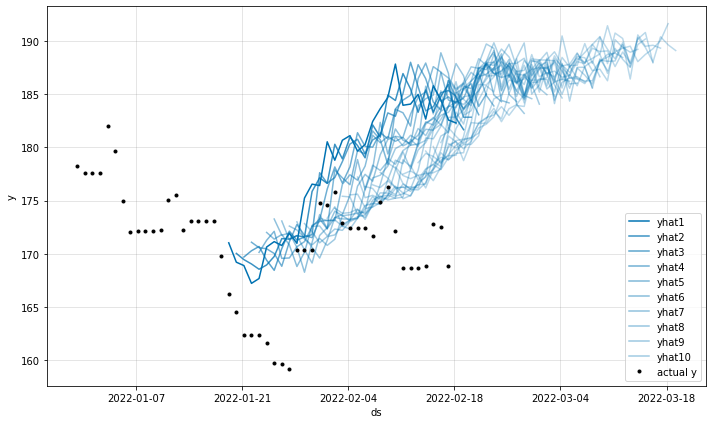

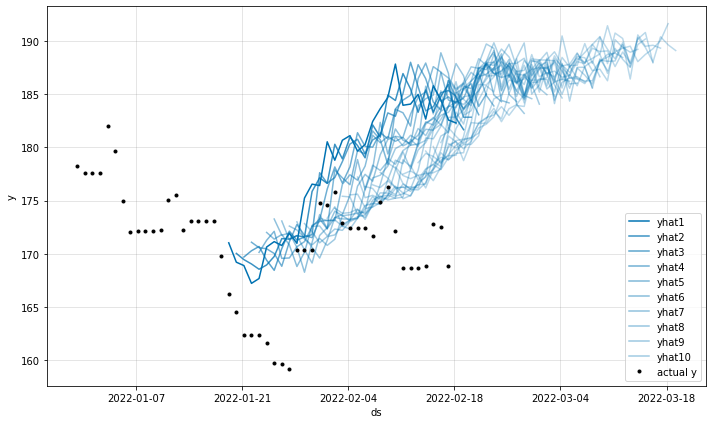

In [339]:
prophet.plot(prediction)

In [341]:
output = prediction.loc[53:][["ds", "yhat30"]]
output

ds      yhat30
53 2022-02-21 05:00:00  182.243408
54 2022-02-22 05:00:00  182.728607
55 2022-02-23 05:00:00  183.664764
56 2022-02-24 05:00:00  182.403137
57 2022-02-25 05:00:00  183.621338
58 2022-02-26 05:00:00  184.008972
59 2022-02-27 05:00:00  184.951935
60 2022-02-28 05:00:00  186.305939
61 2022-03-01 05:00:00  186.313095
62 2022-03-02 05:00:00  186.555252
63 2022-03-03 05:00:00  188.592926
64 2022-03-04 05:00:00  187.434753
65 2022-03-05 05:00:00  186.732803
66 2022-03-06 05:00:00  188.039627
67 2022-03-07 05:00:00  187.872574
68 2022-03-08 05:00:00  189.644318
69 2022-03-09 05:00:00  190.406265
70 2022-03-10 05:00:00  187.859238
71 2022-03-11 05:00:00  190.730743
72 2022-03-12 05:00:00  190.226395
73 2022-03-13 05:00:00  187.556274
74 2022-03-14 05:00:00  190.313339
75 2022-03-15 05:00:00  189.384048
76 2022-03-16 05:00:00   187.99826
77 2022-03-17 05:00:00  190.378952
78 2022-03-18 05:00:00   189.62851
79 2022-03-19 05:00:00  189.090149